# Examples for Email to Fulton County

---
## **Example Duplicates**

### Duplicate analysis for CMR data appended for all years as an example:
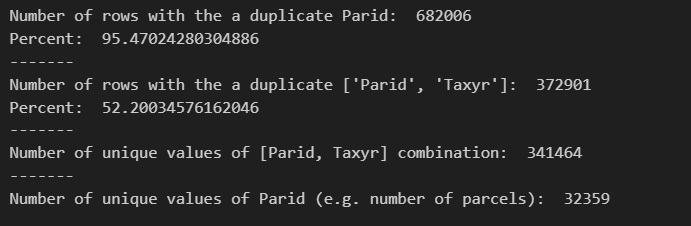   
   
**There are a high number of duplicate Parid, Taxyr keys, meaning some parcels have many rows recorded under the same Parid for the same Taxyr.**

## **Parcel [Digest] (using NF 2022 as a sample)**

10 greatest duplicate counts by Parid

In [5]:
nf.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False).head(10)

,Parid,count
28207,11 114004090029,5
40446,12 191404151088,4
32174,12 147001780463,3
36569,12 175003560310,3
76148,22 397008820403,3
85067,22 491007490381,3
71595,22 345012170265,3
36155,12 172002980573,3
2523,06 0358 LL0840,3
85172,22 493008940604,3


Total number of duplicates in data

### **Example 1, Parid = 11 114004090029**

In [19]:
nf[nf['Parid'] == '11 114004090029'].style.background_gradient(axis=0, cmap='tab10')

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
28260,2022.000000,11 114004090029,2196,10777.000000,nan,BELL,RD,nan,JOHNS CREEK,AG1,57,A5,101.000000,5.000000,80.000000,6.000000,9.000000,1.000000,nan,nan,2.000000,4.000000,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,SEVERAL LIVING UNITS ON PARCEL,nan,nan,nan,nan,5.000000,nan,nan,nan,nan,MN,57,DEEN DAY SANDERS REVOCABLE TRUST THE,nan,nan,nan,nan,P.O. BOX 98309,nan,nan,ATLANTA,GA,nan,nan,30359,E1,nan,3200000.000000,4086740.000000,3.000000,OVR,3200000.000000,4086740.000000,7286740.000000,7286740.000000,2.000000,1.500000,7.000000,1.000000,1988.000000,nan,nan,7.000000,3.000000,1.000000,2.000000,1.000000,6.000000,14.000000,8323.000000,2.000000,-7269.000000,4.000000,2.000000,1.000000,4817.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,1122.000000,3162.000000,0.954000,1.300000,B+,1.350000,nan,nan,GD,1.598300,nan,Y
28261,2022.000000,11 114004090029,2196,10777.000000,nan,BELL,RD,nan,JOHNS CREEK,AG1,57,A5,101.000000,5.000000,80.000000,6.000000,9.000000,1.000000,nan,nan,2.000000,4.000000,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,SEVERAL LIVING UNITS ON PARCEL,nan,nan,nan,nan,5.000000,nan,nan,nan,nan,MN,57,DEEN DAY SANDERS REVOCABLE TRUST THE,nan,nan,nan,nan,P.O. BOX 98309,nan,nan,ATLANTA,GA,nan,nan,30359,E1,nan,3200000.000000,4086740.000000,3.000000,OVR,3200000.000000,4086740.000000,7286740.000000,7286740.000000,5.000000,1.000000,1.000000,1.000000,1982.000000,nan,nan,3.000000,1.000000,0.000000,1.000000,0.000000,5.000000,8.000000,2055.000000,1.000000,-7440.000000,4.000000,1.000000,1.000000,2040.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,702.000000,702.000000,0.709000,1.000000,C,1.000000,nan,nan,AV,1.598300,nan,Y
28262,2022.000000,11 114004090029,2196,10777.000000,nan,BELL,RD,nan,JOHNS CREEK,AG1,57,A5,101.000000,5.000000,80.000000,6.000000,9.000000,1.000000,nan,nan,2.000000,4.000000,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,SEVERAL LIVING UNITS ON PARCEL,nan,nan,nan,nan,5.000000,nan,nan,nan,nan,MN,57,DEEN DAY SANDERS REVOCABLE TRUST THE,nan,nan,nan,nan,P.O. BOX 98309,nan,nan,ATLANTA,GA,nan,nan,30359,E1,nan,3200000.000000,4086740.000000,3.000000,OVR,3200000.000000,4086740.000000,7286740.000000,7286740.000000,3.000000,1.000000,7.000000,6.000000,1982.000000,nan,nan,7.000000,4.000000,1.000000,4.000000,1.000000,12.000000,26.000000,19420.000000,4.000000,0.000000,4.000000,2.000000,4.000000,15757.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,1.000000,1.000000,nan,4624.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,6434.000000,6434.000000,4.057000,1.000000,B+,1.350000,nan,nan,GD,1.598300,nan,Y
28263,2022.000000,11 114004090029,2196,10777.000000,nan,BELL,RD,nan,JOHNS CREEK,AG1,57,A5,101.000000,5.000000,80.000000,6.000000,9.000000,1.000000,nan,nan,2.000000,4.000000,nan,1.000000,nan,nan,3.000000

**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, Style, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Fuel, Heatsys, Heatval, Wbfp 0, Wbfp S, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact, D Cdu, Adjfact.

**Note2: "Several living units on Parcel"**

### **Example 2, Parid = 12 191404151088**

In [20]:
nf[nf['Parid'] == '12 191404151088'].style.background_gradient(axis=0, cmap='tab10')

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
40570,2022.000000,12 191404151088,24272,654.000000,nan,ELM,ST,nan,ROSWELL,R4,45,R3,101.000000,1.000000,0.420700,6.000000,9.000000,1.000000,nan,nan,2.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,nan,nan,nan,nan,nan,4.000000,nan,nan,nan,nan,LD,45,ELM STREET PARTNERS LLC,nan,654.000000,nan,nan,ELM,ST,nan,ROSWELL,GA,nan,620,30075,0,nan,131400.000000,1173400.000000,1.000000,20,142400.000000,759800.000000,902200.000000,1304800.000000,2.000000,2.000000,4.000000,1.000000,2001.000000,nan,nan,10.000000,4.000000,2.000000,4.000000,2.000000,6.000000,22.000000,11645.000000,1.000000,-10494.000000,4.000000,1.000000,1.000000,4316.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,2.000000,4658.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,1200.000000,2400.000000,1.000000,1.500000,C,1.000000,nan,nan,GD,2.656000,nan,Y
40571,2022.000000,12 191404151088,24272,654.000000,nan,ELM,ST,nan,ROSWELL,R4,45,R3,101.000000,1.000000,0.420700,6.000000,9.000000,1.000000,nan,nan,2.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,nan,nan,nan,nan,nan,4.000000,nan,nan,nan,nan,LD,45,ELM STREET PARTNERS LLC,nan,654.000000,nan,nan,ELM,ST,nan,ROSWELL,GA,nan,620,30075,0,nan,131400.000000,1173400.000000,1.000000,20,142400.000000,759800.000000,902200.000000,1304800.000000,1.000000,1.000000,1.000000,1.000000,1900.000000,nan,nan,4.000000,2.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,2.000000,-3513.000000,2.000000,1.000000,6.000000,-1202.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,1.000000,1.000000,nan,2672.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,854.000000,854.000000,0.798000,1.000000,D,0.780000,nan,nan,FR,2.656000,nan,Y
40572,2022.000000,12 191404151088,24272,654.000000,nan,ELM,ST,nan,ROSWELL,R4,45,R3,101.000000,1.000000,0.420700,6.000000,9.000000,1.000000,nan,nan,2.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,nan,nan,nan,nan,nan,4.000000,nan,nan,nan,nan,LD,45,ELM STREET PARTNERS LLC,nan,654.000000,nan,nan,ELM,ST,nan,ROSWELL,GA,nan,620,30075,0,nan,131400.000000,1173400.000000,1.000000,20,142400.000000,759800.000000,902200.000000,1304800.000000,3.000000,2.000000,4.000000,1.000000,2001.000000,nan,nan,10.000000,4.000000,2.000000,4.000000,2.000000,6.000000,22.000000,11645.000000,1.000000,-10494.000000,4.000000,1.000000,1.000000,4316.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,2.000000,4658.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,1200.000000,2400.000000,1.000000,1.500000,C,1.000000,nan,nan,GD,2.656000,nan,Y
40573,2022.000000,12 191404151088,24272,654.000000,nan,ELM,ST,nan,ROSWELL,R4,45,R3,101.000000,1.000000,0.420700,6.000000,9.000000,1.000000,nan,nan,2.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,nan,nan,nan,nan,nan,nan,4.000000,nan,nan,nan,nan,LD,45,ELM STREET PARTNERS LLC,nan,654.000000,nan,nan,ELM,ST,nan,ROSWELL,GA,nan,620,30075,0,nan,131400.000000,1173400.0

**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heat, Heatsys, Heatval, Wbfp 0, Wbfp S, Wbfp Pf, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact, D Cdu, Adjfact.

### **Example 3, Parid = 12 147001780463**

In [21]:
nf[nf['Parid'] == '12 147001780463'].style.background_gradient(axis=0, cmap='tab10')

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
32256,2022.000000,12 147001780463,2476,1225.000000,nan,JONES,RD,nan,ROSWELL,E1,45,R4,101.000000,1.000000,9.400000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,1.000000,STRUCTURE IS NOT BARN BUT A STORAGE,WAREHOUSE @100% COMP VERIFIED DATA 2 /17,DATA VERIFIED 7/2017,nan,nan,nan,3.000000,nan,nan,4.000000,2000.000000,MN,45,MIMMS MALON D JR,nan,1270.000000,nan,nan,JONES,RD,nan,ROSWELL,GA,nan,nan,30075,S1,nan,589000.000000,1227000.000000,3.000000,80,589000.000000,1227000.000000,1816000.000000,1816000.000000,3.000000,1.500000,1.000000,2.000000,2006.000000,nan,nan,3.000000,nan,nan,0.000000,0.000000,2.000000,2.000000,-2055.000000,1.000000,-3138.000000,4.000000,1.000000,1.000000,1118.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,0.000000,0.299000,1.300000,C,1.000000,nan,nan,GD,2.002400,nan,Y
32257,2022.000000,12 147001780463,2476,1225.000000,nan,JONES,RD,nan,ROSWELL,E1,45,R4,101.000000,1.000000,9.400000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,1.000000,STRUCTURE IS NOT BARN BUT A STORAGE,WAREHOUSE @100% COMP VERIFIED DATA 2 /17,DATA VERIFIED 7/2017,nan,nan,nan,3.000000,nan,nan,4.000000,2000.000000,MN,45,MIMMS MALON D JR,nan,1270.000000,nan,nan,JONES,RD,nan,ROSWELL,GA,nan,nan,30075,S1,nan,589000.000000,1227000.000000,3.000000,80,589000.000000,1227000.000000,1816000.000000,1816000.000000,2.000000,1.500000,1.000000,2.000000,2006.000000,nan,nan,3.000000,nan,nan,0.000000,2.000000,8.000000,12.000000,5179.000000,1.000000,-17375.000000,4.000000,1.000000,1.000000,6192.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,2112.000000,13696.000000,1.533000,1.300000,C+,1.080000,nan,nan,GD,2.002400,nan,Y
32258,2022.000000,12 147001780463,2476,1225.000000,nan,JONES,RD,nan,ROSWELL,E1,45,R4,101.000000,1.000000,9.400000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,1.000000,STRUCTURE IS NOT BARN BUT A STORAGE,WAREHOUSE @100% COMP VERIFIED DATA 2 /17,DATA VERIFIED 7/2017,nan,nan,nan,3.000000,nan,nan,4.000000,2000.000000,MN,45,MIMMS MALON D JR,nan,1270.000000,nan,nan,JONES,RD,nan,ROSWELL,GA,nan,nan,30075,S1,nan,589000.000000,1227000.000000,3.000000,80,589000.000000,1227000.000000,1816000.000000,1816000.000000,1.000000,1.000000,1.000000,2.000000,1915.000000,nan,1980.000000,7.000000,4.000000,0.000000,2.000000,0.000000,2.000000,8.000000,2055.000000,2.000000,-7868.000000,4.000000,1.000000,1.000000,4011.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,1874.000000,1874.000000,1.394000,1.000000,C,1.000000,nan,nan,GD,2.002400,nan,Y


**SAME PARID, DIFFERENT:**
D Card, Stories, D Yrblt, D Yrremod, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heatval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note1: "STRUCTURE IS NOT BARN BUT A STORAGE"**

### **Example 4, Parid = 12 175003560310**

In [22]:
nf[nf['Parid'] == '12 175003560310'].style.background_gradient(axis=0, cmap='tab10')

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
36670,2022.000000,12 175003560310,24063,340.000000,nan,CHAFFIN,RD,nan,ROSWELL,E2,45,R5,101.000000,1.000000,10.510000,6.000000,8.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,PARENT OF COMBINATION NO 25933,PARCELS 029-4 AND 036-9 COMBINED WITH,031-0 FOR 2007,AN CORRECTED NBHD CODE 2/14,nan,nan,3.000000,nan,nan,nan,nan,MN,45,HOVATER RODNEY T ET AL,nan,340.000000,nan,nan,CHAFFIN,RD,nan,ROSWELL,GA,nan,nan,30075,E1,nan,362500.000000,706400.000000,3.000000,70,362500.000000,706400.000000,1068900.000000,1068900.000000,1.000000,2.000000,1.000000,1.000000,1970.000000,nan,nan,9.000000,5.000000,2.000000,3.000000,1.000000,2.000000,13.000000,6905.000000,2.000000,-6870.000000,4.000000,1.000000,1.000000,5253.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,2.000000,1.000000,nan,6560.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,1142.000000,3920.000000,0.966000,1.500000,B,1.260000,nan,nan,GD,1.346100,nan,Y
36671,2022.000000,12 175003560310,24063,340.000000,nan,CHAFFIN,RD,nan,ROSWELL,E2,45,R5,101.000000,1.000000,10.510000,6.000000,8.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,PARENT OF COMBINATION NO 25933,PARCELS 029-4 AND 036-9 COMBINED WITH,031-0 FOR 2007,AN CORRECTED NBHD CODE 2/14,nan,nan,3.000000,nan,nan,nan,nan,MN,45,HOVATER RODNEY T ET AL,nan,340.000000,nan,nan,CHAFFIN,RD,nan,ROSWELL,GA,nan,nan,30075,E1,nan,362500.000000,706400.000000,3.000000,70,362500.000000,706400.000000,1068900.000000,1068900.000000,2.000000,1.000000,1.000000,1.000000,1970.000000,nan,nan,nan,1.000000,nan,1.000000,nan,4.000000,7.000000,1260.000000,2.000000,-4206.000000,4.000000,1.000000,1.000000,2144.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,875.000000,875.000000,0.810000,1.000000,C-,0.920000,nan,nan,AV,1.346100,nan,Y
36672,2022.000000,12 175003560310,24063,340.000000,nan,CHAFFIN,RD,nan,ROSWELL,E2,45,R5,101.000000,1.000000,10.510000,6.000000,8.000000,1.000000,nan,nan,1.000000,nan,nan,1.000000,nan,nan,3.000000,2.000000,3.000000,PARENT OF COMBINATION NO 25933,PARCELS 029-4 AND 036-9 COMBINED WITH,031-0 FOR 2007,AN CORRECTED NBHD CODE 2/14,nan,nan,3.000000,nan,nan,nan,nan,MN,45,HOVATER RODNEY T ET AL,nan,340.000000,nan,nan,CHAFFIN,RD,nan,ROSWELL,GA,nan,nan,30075,E1,nan,362500.000000,706400.000000,3.000000,70,362500.000000,706400.000000,1068900.000000,1068900.000000,3.000000,1.000000,1.000000,1.000000,1970.000000,nan,nan,nan,nan,nan,1.000000,nan,4.000000,7.000000,1260.000000,2.000000,-2643.000000,2.000000,2.000000,2.000000,-905.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,360.000000,468.000000,0.509000,1.000000,C-,0.920000,nan,nan,AV,1.346100,nan,Y


**SAME PARID, DIFFERENT:**
D Card, Stories, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Heat, Fuel, Heatsys, Heatval, Wbfp O, Wbfp S, Wbfpval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note(s): "PARENT OF COMBINATION NO 25933, PARCELS 029-4 AND 036-9 COMBINED WITH, ..."**

### **Example 5, Parid = 22 397008820403**

In [23]:
nf[nf['Parid'] == '22 397008820403'].style.background_gradient(axis=0, cmap='tab10')

,Taxyr,Parid,Nbhd,Situs Adrno,Situs Adrdir,Situs Adrstr,Situs Adrsuf,Situs Adrsuf2,Cityname,Zoning,Muni,Class,Luc,Livunit,Calcacres,Location,Fronting,Street1,Street2,Traffic,Topo1,Topo2,Topo3,Util1,Util2,Util3,Parkprox,Parkquanit,Parktype,Note1,Note2,Note3,Note4,Notecd1,Notecd2,Ofcard,Bldgros D,Bldgros V,Mscbld N,Mscbld V,Chgrsn,Taxdist,Own1,Own2,Owner Adrno,Owner Adradd,Owner Adrdir,Owner Adrstr,Owner Adrsuf,Owner Adrsuf2,Cityname.1,Statecode,Country,Unitno,Zip1,Reascd,Spcflg,Aprland,Aprbldg,Revcode,Revreas,Revland,Revbldg,Revtot,Aprtot,D Card,Stories,Extwall,Style,D Yrblt,D Effyr,D Yrremod,Rmtot,Rmbed,Rmfam,Fixbath,Fixhalf,Fixaddl,Fixtot,Plumval,Bsmt,Bsmtval,Heat,Fuel,Heatsys,Heatval,Attic,Atticval,Unfinarea,Unfinval,Recromarea,Recval,Finbsmtarea,Finbsmtval,Ufeatarea,Ufeatval,Wbfp O,Wbfp S,Wbfp Pf,Wbfpval,Bsmtcar,Bgarval,Msc1des,Msc1num,Msc1val,Msc2des,Msc2num,Msc2val,Condolvl,Condovw,Mgfa,Sfla,Areafact,Shfact,D Grade,D Grdfact,Cddesc,Cdpct,D Cdu,Adjfact 2,D Pctcomplete,Cur
76378,2022.000000,22 397008820403,22804,13750.000000,nan,BIRMINGHAM,HWY,nan,MILTON,AG1,56,R4,101.000000,1.000000,3.650000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,2.000000,5.000000,7.000000,3.000000,2.000000,3.000000,CORRECTED DATA/ADDITIONS,EST BSMT 7/17,8/17 P/U POOL HOUE AND ESTIMATED DUE,"TO BACK GATE LOCKED, EXISTING POOL HOUSE",nan,nan,3.000000,nan,nan,nan,nan,RV,56,MUTA MATTHEW SHIGENOBU &,MUTA AMY SUZANNE,13750.000000,nan,nan,BIRMINGHAM,HWY,nan,ALPHARETTA,GA,nan,nan,30004,nan,nan,443200.000000,1284000.000000,nan,nan,nan,nan,nan,1727200.000000,2.000000,1.000000,1.000000,1.000000,1988.000000,nan,nan,5.000000,2.000000,0.000000,1.000000,0.000000,6.000000,9.000000,2329.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1800.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,2.000000,1886.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,748.000000,748.000000,0.736000,1.000000,D+,0.850000,nan,nan,GD,1.689300,nan,Y
76379,2022.000000,22 397008820403,22804,13750.000000,nan,BIRMINGHAM,HWY,nan,MILTON,AG1,56,R4,101.000000,1.000000,3.650000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,2.000000,5.000000,7.000000,3.000000,2.000000,3.000000,CORRECTED DATA/ADDITIONS,EST BSMT 7/17,8/17 P/U POOL HOUE AND ESTIMATED DUE,"TO BACK GATE LOCKED, EXISTING POOL HOUSE",nan,nan,3.000000,nan,nan,nan,nan,RV,56,MUTA MATTHEW SHIGENOBU &,MUTA AMY SUZANNE,13750.000000,nan,nan,BIRMINGHAM,HWY,nan,ALPHARETTA,GA,nan,nan,30004,nan,nan,443200.000000,1284000.000000,nan,nan,nan,nan,nan,1727200.000000,3.000000,1.000000,3.000000,1.000000,1998.000000,nan,nan,1.000000,nan,1.000000,1.000000,nan,6.000000,9.000000,5754.000000,1.000000,-12297.000000,4.000000,nan,nan,3371.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,444.000000,444.000000,0.558000,1.000000,X,2.100000,nan,nan,GD,1.689300,nan,Y
76380,2022.000000,22 397008820403,22804,13750.000000,nan,BIRMINGHAM,HWY,nan,MILTON,AG1,56,R4,101.000000,1.000000,3.650000,6.000000,9.000000,1.000000,nan,nan,1.000000,nan,nan,2.000000,5.000000,7.000000,3.000000,2.000000,3.000000,CORRECTED DATA/ADDITIONS,EST BSMT 7/17,8/17 P/U POOL HOUE AND ESTIMATED DUE,"TO BACK GATE LOCKED, EXISTING POOL HOUSE",nan,nan,3.000000,nan,nan,nan,nan,RV,56,MUTA MATTHEW SHIGENOBU &,MUTA AMY SUZANNE,13750.000000,nan,nan,BIRMINGHAM,HWY,nan,ALPHARETTA,GA,nan,nan,30004,nan,nan,443200.000000,1284000.000000,nan,nan,nan,nan,nan,1727200.000000,1.000000,1.500000,3.000000,1.000000,1988.000000,nan,nan,10.000000,4.000000,1.000000,4.000000,3.000000,10.000000,28.000000,33086.000000,4.000000,0.000000,4.000000,2.000000,4.000000,14420.000000,1.000000,0.000000,nan,0.000000,nan,0.000000,nan,0.000000,1400.000000,74514.000000,nan,nan,2.000000,9782.000000,1.000000,3625.000000,nan,nan,0.000000,nan,nan,0.000000,nan,nan,2632.000000,5699.000000,1.836000,1.300000,X,2.100000,nan,nan,GD,1.689300,nan,Y


**SAME PARID, DIFFERENT:**
D Card, Stories, Extwall, D Yrblt, Rmtot, Rmbed, Rmfam, Fixbath, Fixhalf, Fixaddl, Fixtot, Plumval, Bsmt, Bsmtval, Fuel, Heatsys, Heatval, Ufeatval, Wbfp Pf, Wbfpval, Bsmtcar, Bgarval, Mgfa, Sfla, Areafact, Shfact, D Grade, D Grdfact.

**Note1: "CORRECTED DATA/ADDITIONS"**

---
## **Sales (Standards Sales; all years, appended)**

10 greatest duplicate counts by Parid. It makes sense that Sales has duplicates, a property can be sold multiple times, but let's look at some examples.

In [30]:
sales_appended.groupby('Parid').size().reset_index('Parid').rename({0:'count'}, axis=1).sort_values(by='count', ascending=False).head(10)

,Parid,count
98060,14 007800070969,653
224,06 0313 LL0331,36
20848,09F250601050319,31
94184,14 005700100241,29
19073,09F220100990190,27
170202,17 009500060459,26
203583,17 026600010077,26
102023,14 008900010095,26
143223,14F0131 LL0040,24
107344,14 011100060621,24


In [57]:
sales_0 = len(sales_appended[((sales_appended['SALES PRICE'] == '0') | (sales_appended['SALES PRICE'] is None)) & ((sales_appended['DEED TYPE'] != 'QC') & (sales_appended['DEED TYPE'] != 'G'))].index)
print("Percent of entries with SALES PRICE = 0:", sales_0/len(sales_appended) * 100)

Percent of entries with SALES PRICE = 0: 12.153612406349872


### **Example 1, Parid = 06 0313  LL0331**

In [38]:
sales_appended[sales_appended['Parid'] == '06 0313  LL0331'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,DEED TYPE,Aprland,Aprbldg,Costval,Saleval,Who,Wen,GRANTOR,GRANTEE,Revcode,Reascd,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1,Whocalc,Wencalc,Saletype,Appraiser ID,Income,Bldgros V,Mscbld V,Val30 SUM,Areasum
76,2013,2012.000000,May,59,06 0313 LL0331,C112,C4,2A1,18-MAY-2012,51239.000000,275.000000,"79,766","19,004,100",WD,6790000.000000,12214100.000000,20854900.000000,I,TA_DAROBIN,11-JAN-2013,"3100 RIVER EXCHANGE 40, LLC, A DELAWARE",ARRT RIVER EXCHANGE OWNER LLC,4.000000,CO,nan,3100.000000,nan,RIVER EXCHANGE,DR,nan,FUL,nan,194.000000,22.970000,OIC,nan,nan,MA,Y,Y,CA403,21-MAY-2013,2,nan,nan,nan,nan,nan,nan
77,2013,2012.000000,May,59,06 0313 LL0331,C112,C4,2A1,18-MAY-2012,51239.000000,155.000000,"110,000","19,004,100",WD,6790000.000000,12214100.000000,20854900.000000,I,TA_DAROBIN,11-JAN-2013,"3100 RIVER EXCHANGE 3, LLC, A DELAWARE L",ARRT RIVER EXCHANGE OWNER LLC,4.000000,CO,nan,3100.000000,nan,RIVER EXCHANGE,DR,nan,FUL,nan,194.000000,22.970000,OIC,nan,nan,MA,Y,Y,CA403,21-MAY-2013,2,nan,nan,nan,nan,nan,nan
78,2013,2012.000000,May,59,06 0313 LL0331,C112,C4,2A1,18-MAY-2012,51239.000000,289.000000,"83,346","19,004,100",WD,6790000.000000,12214100.000000,20854900.000000,I,TA_DAROBIN,11-JAN-2013,"3100 RIVER EXCHANGE 38, LLC, A DELAWARE",ARRT RIVER EXCHANGE OWNER LLC,4.000000,CO,nan,3100.000000,nan,RIVER EXCHANGE,DR,nan,FUL,nan,194.000000,22.970000,OIC,nan,nan,MA,Y,Y,CA403,21-MAY-2013,2,nan,nan,nan,nan,nan,nan
79,2013,2012.000000,May,59,06 0313 LL0331,C112,C4,2A1,18-MAY-2012,51239.000000,368.000000,"175,642","19,004,100",WD,6790000.000000,12214100.000000,20854900.000000,I,TA_DAROBIN,11-JAN-2013,"3100 RIVER EXCHANGE 25, LLC, A DELAWARE",ARRT RIVER EXCHANGE OWNER LLC,4.000000,CO,nan,3100.000000,nan,RIVER EXCHANGE,DR,nan,FUL,nan,194.000000,22.970000,OIC,nan,nan,MA,Y,Y,CA403,21-MAY-2013,2,nan,nan,nan,nan,nan,nan


Same Saledt and Wen; Grantor and Grantee are the same across all purchases. Is this a multiparcel sale? Salesprice is different for each purchase in this case, are there ever cases where the salesprice will be recorded as the total of the multiparcel sale?

### **Example 2, Parid = 09F250601050319**

In [39]:
sales_appended[sales_appended['Parid'] == '09F250601050319'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,DEED TYPE,Aprland,Aprbldg,Costval,Saleval,Who,Wen,GRANTOR,GRANTEE,Revcode,Reascd,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1,Whocalc,Wencalc,Saletype,Appraiser ID,Income,Bldgros V,Mscbld V,Val30 SUM,Areasum
4530,2018,2017.000000,Jul,55,09F250601050319,9608,R3,101,08-JUL-2017,57780.000000,30.000000,0,"70,000",QC,"16,200","53,800","78,600",G,TA_SWILLIN,26-JAN-2018,BROUGHTON RUBY,ROBINSON SANDRA BEBEE,3.000000,E8,nan,3760.000000,nan,MORNING CREEK,DR,nan,SOUTH FULTON,nan,1.000000,0.408200,R4,nan,nan,RV,Y,Y,nan,nan,nan,3.000000,0,nan,100.000000,78600.000000,1416.000000
4531,2018,2017.000000,Jul,55,09F250601050319,9608,R3,101,08-JUL-2017,57780.000000,49.000000,0,"70,000",QC,"16,200","53,800","78,600",G,TA_SWILLIN,26-JAN-2018,IAM BRITTANY,ROBINSON SANDRA BEBEE,3.000000,E8,nan,3760.000000,nan,MORNING CREEK,DR,nan,SOUTH FULTON,nan,1.000000,0.408200,R4,nan,nan,RV,Y,Y,nan,nan,nan,3.000000,0,nan,100.000000,78600.000000,1416.000000
4532,2018,2017.000000,Jul,55,09F250601050319,9608,R3,101,01-JUL-2017,57780.000000,43.000000,0,"70,000",QC,"16,200","53,800","78,600",G,TA_SWILLIN,26-JAN-2018,JACKSON ANTHONY,ROBINSON SANDRA BEBEE,3.000000,E8,nan,3760.000000,nan,MORNING CREEK,DR,nan,SOUTH FULTON,nan,1.000000,0.408200,R4,nan,nan,RV,Y,Y,nan,nan,nan,3.000000,0,nan,100.000000,78600.000000,1416.000000
4533,2018,2017.000000,Jul,55,09F250601050319,9608,R3,101,08-JUL-2017,57780.000000,22.000000,0,"70,000",QC,"16,200","53,800","78,600",G,TA_SWILLIN,26-JAN-2018,TAYLOR JOANN,ROBINSON SANDRA BEBEE,3.000000,E8,nan,3760.000000,nan,MORNING CREEK,DR,nan,SOUTH FULTON,nan,1.000000,0.408200,R4,nan,nan,RV,Y,Y,nan,nan,nan,3.000000,0,nan,100.000000,78600.000000,1416.000000


Same Grantee, different Grantors. Salesprice 0 for every transcation. The deed is a QC though.

### **Example 3, Parid = 14 005700100241**

In [40]:
sales_appended[sales_appended['Parid'] == '14 005700100241'].head(4).style.background_gradient(axis=0, vmin=1, vmax=5, cmap='tab10')

,Taxyr,Saledt: Year (YYYY),Saledt: Month (Mon),Taxdist,Parid,Nbhd,Class,Luc,Saledt,Book,Page,SALES PRICE,FAIR MARKET VALUE,DEED TYPE,Aprland,Aprbldg,Costval,Saleval,Who,Wen,GRANTOR,GRANTEE,Revcode,Reascd,Adrpre,Adrno,Adrdir,Adrstr,Adrsuf,Adrsuf2,Cityname,Unitno,Livunit,Calcacres,Zoning,Notecd1,Notecd2,Chgrsn,Cur,Cur.1,Whocalc,Wencalc,Saletype,Appraiser ID,Income,Bldgros V,Mscbld V,Val30 SUM,Areasum
23938,2022,2021.000000,Apr,05,14 005700100241,14284,R3,100,13-APR-2021,63634.000000,305.000000,300,"63,100",QC,"63,100",0,"63,100",6F,TA_NWILLIA,16-NOV-2021,DANIEL RICHARD,MAPLE STREET RE LLC,1.000000,00,nan,89.000000,nan,HARDWICK,ST,SE,ATLANTA,nan,0.000000,0.298400,R4,nan,nan,DC,Y,Y,LP401,15-MAY-2022,1,84.000000,0,nan,nan,63100.000000,0.000000
23939,2022,2021.000000,Mar,05,14 005700100241,14284,R3,100,30-MAR-2021,63634.000000,323.000000,400,"63,100",QC,"63,100",0,"63,100",6F,TA_JLEE,18-APR-2022,LATIMORE JUANITA,MAPLE STREET RE LLC,1.000000,00,nan,89.000000,nan,HARDWICK,ST,SE,ATLANTA,nan,0.000000,0.298400,R4,nan,nan,DC,Y,Y,LP401,15-MAY-2022,2,84.000000,0,nan,nan,63100.000000,0.000000
23940,2022,2021.000000,Apr,05,14 005700100241,14284,R3,100,06-APR-2021,63634.000000,315.000000,500,"63,100",QC,"63,100",0,"63,100",6F,TA_NWILLIA,16-NOV-2021,GAVIN DAVID,MAPLE STREET RE LLC,1.000000,00,nan,89.000000,nan,HARDWICK,ST,SE,ATLANTA,nan,0.000000,0.298400,R4,nan,nan,DC,Y,Y,LP401,15-MAY-2022,1,84.000000,0,nan,nan,63100.000000,0.000000
23941,2022,2021.000000,Apr,05,14 005700100241,14284,R3,100,01-APR-2021,63634.000000,329.000000,"1,000","63,100",QC,"63,100",0,"63,100",6F,TA_NWILLIA,16-NOV-2021,GAVIN BERNICE,MAPLE STREET RE LLC,1.000000,00,nan,89.000000,nan,HARDWICK,ST,SE,ATLANTA,nan,0.000000,0.298400,R4,nan,nan,DC,Y,Y,LP401,15-MAY-2022,1,84.000000,0,nan,nan,63100.000000,0.000000


Different Saledt, Page, Sales Price, Grantor; One company buying from multiple owners (with different properties?) on one parcel